In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [ ]:
#get the stock data
df = web.DataReader("NFLX",data_source="yahoo",start="2019-12-31",end="2020-05-31")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,324.920013,321.089996,322.000000,323.570007,3713300,323.570007
2020-01-02,329.980011,324.779999,326.100006,329.809998,4485800,329.809998
2020-01-03,329.859985,325.529999,326.779999,325.899994,3806900,325.899994
2020-01-06,336.359985,321.200012,323.119995,335.829987,5663100,335.829987
2020-01-07,336.700012,330.299988,336.470001,330.750000,4703200,330.750000
...,...,...,...,...,...,...
2020-05-22,439.089996,427.179993,437.000000,429.320007,5422300,429.320007
2020-05-26,428.500000,413.140015,427.769989,414.769989,7881100,414.769989
2020-05-27,420.019989,397.859985,410.380005,419.890015,10446300,419.890015


In [ ]:
#training days
df.shape

(104, 6)

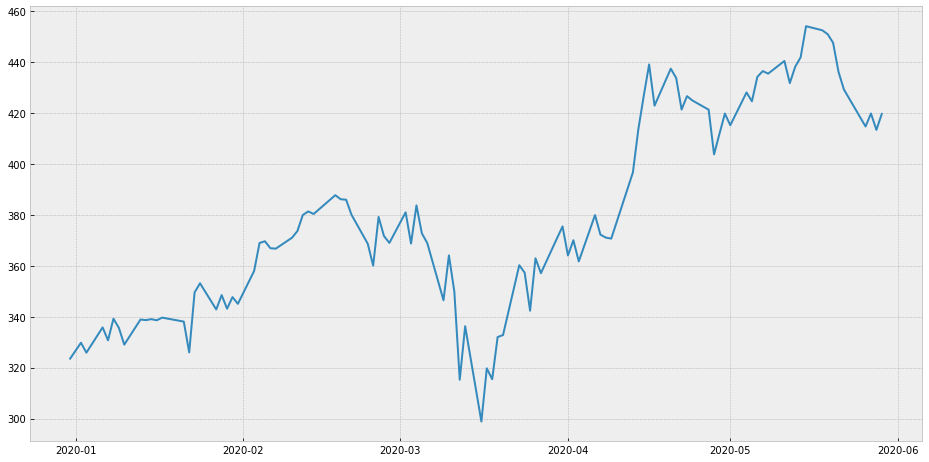

In [ ]:
#visualization
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.show()

In [ ]:
df=df[["Close"]]
df

,Close
Date,
2019-12-31,323.570007
2020-01-02,329.809998
2020-01-03,325.899994
2020-01-06,335.829987
2020-01-07,330.750000
...,...
2020-05-22,429.320007
2020-05-26,414.769989
2020-05-27,419.890015


In [ ]:
#create a variable to predict x days into the future
future_days=25
#create a new column(target) shifted x unit/days up
df["Prediction"]=df[['Close']].shift(-future_days)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
Date,,
2019-12-31,323.570007,366.950012
2020-01-02,329.809998,366.769989
2020-01-03,325.899994,371.070007
2020-01-06,335.829987,373.690002
2020-01-07,330.750000,380.010010
...,...,...
2020-05-22,429.320007,NaN
2020-05-26,414.769989,NaN
2020-05-27,419.890015,NaN


In [ ]:
#create the feature dataset (x) and convert it into numpy array and remove the last x days
x = np.array(df.drop(['Prediction'],1))[:-future_days]
print(x[:5])

[[323.57000732]
 [329.80999756]
 [325.8999939 ]
 [335.82998657]
 [330.75      ]]


In [ ]:
#create the target data set(y) and convert it into numpy array and get all of the target values except last x days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[366.95001221 366.76998901 371.07000732 373.69000244 380.01000977
 381.3999939  380.3999939  387.77999878 386.19000244 386.
 380.07000732 368.70001221 360.08999634 379.23999023 371.70999146
 369.02999878 381.04998779 368.76998901 383.79000854 372.77999878
 368.97000122 346.48999023 364.13000488 349.92001343 315.25
 336.29998779 298.83999634 319.75       315.47000122 332.02999878
 332.82998657 360.26998901 357.32000732 342.39001465 362.98999023
 357.11999512 370.95999146 375.5        364.07998657 370.07998657
 361.76000977 379.95999146 372.27999878 371.11999512 370.72000122
 396.72000122 413.54998779 426.75       439.17001343 422.95999146
 437.48999023 433.82998657 421.42001343 426.70001221 424.98999023
 421.38000488 403.82998657 411.89001465 419.8500061  415.26998901
 428.1499939  424.67999268 434.26000977 436.52999878 435.54998779
 440.51998901 431.82000732 438.26998901 441.95001221 454.19000244
 452.57998657 451.04000854 447.67001343 436.25       429.32000732
 414.76998901 419.890014

In [ ]:
#splitting data into 75% training and 25% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [ ]:
#creating model
#decision tree regression model
tree= DecisionTreeRegressor().fit(x_train,y_train)
#Linear regression model
lr = LinearRegression().fit(x_train,y_train)

In [ ]:
#get the last x rows of feature data set
x_future= df.drop(["Prediction"],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[332.02999878],
       [332.82998657],
       [360.26998901],
       [357.32000732],
       [342.39001465],
       [362.98999023],
       [357.11999512],
       [370.95999146],
       [375.5       ],
       [364.07998657],
       [370.07998657],
       [361.76000977],
       [379.95999146],
       [372.27999878],
       [371.11999512],
       [370.72000122],
       [396.72000122],
       [413.54998779],
       [426.75      ],
       [439.17001343],
       [422.95999146],
       [437.48999023],
       [433.82998657],
       [421.42001343],
       [426.70001221]])

In [ ]:
#show model tree prediction
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()
#show model linear regrssion
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[424.98999023 424.98999023 440.51998901 364.13000488 419.8500061
 415.26998901 364.13000488 424.67999268 434.26000977 436.52999878
 435.54998779 440.51998901 431.82000732 438.26998901 441.95001221
 424.67999268 452.57998657 451.04000854 419.73001099 436.25
 429.32000732 414.76998901 419.89001465 413.44000244 419.73001099]

[384.64863667 384.78088945 389.31722954 388.82954299 386.36133897
 389.76689607 388.79647727 391.08448473 391.83503214 389.94709263
 390.93900364 389.56355754 392.57235125 391.30270636 391.1109363
 391.04480991 395.34309095 398.12539911 400.30760535 402.36086337
 399.68104682 402.08312445 401.47805813 399.42645996 400.29934145]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


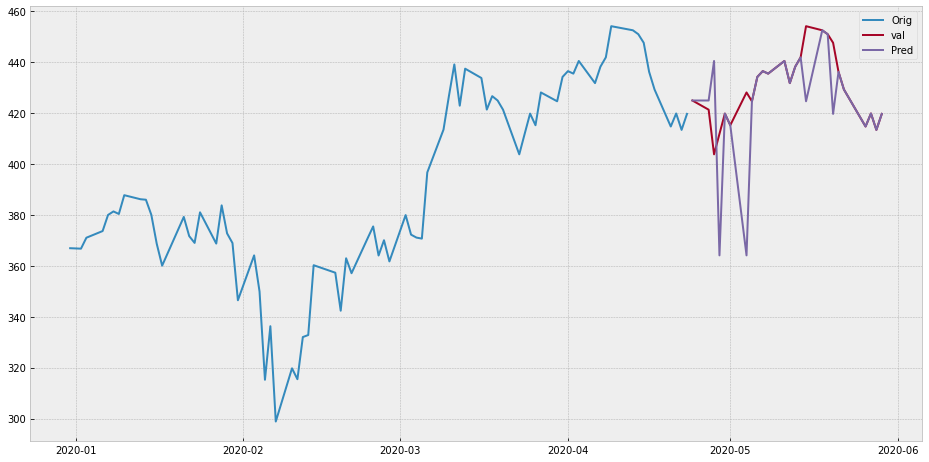

In [ ]:
#visualization
prediction=tree_prediction
valid=df[x.shape[0]:]
valid["Predictions"]=prediction
plt.figure(figsize=(16,8))
plt.plot(df["Prediction"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Orig","val","Pred"])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


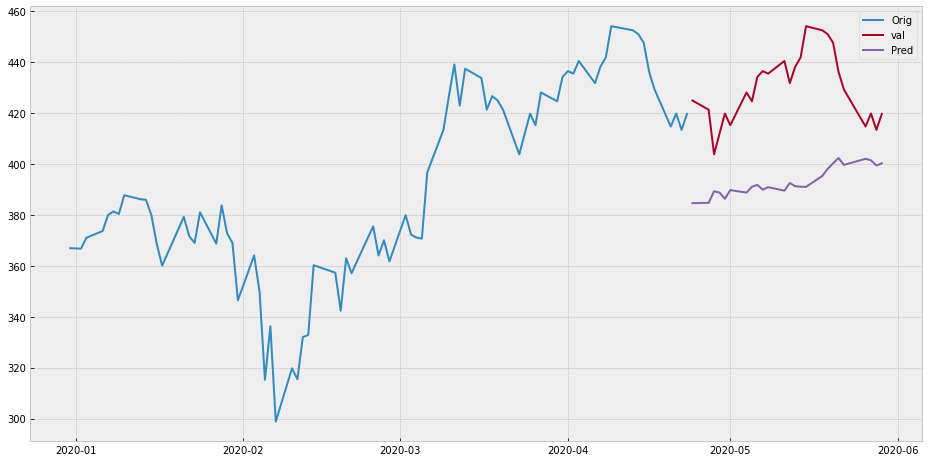

In [ ]:
#visualization
prediction=lr_prediction
valid=df[x.shape[0]:]
valid["Predictions"]=prediction
plt.figure(figsize=(16,8))
plt.plot(df["Prediction"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Orig","val","Pred"])
plt.show()